In [5]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

In [6]:

# today = date.today()
# d1 = today.strftime("%Y-%m-%d")
# end_date = d1
# d2 = date.today() - timedelta(days=365)
# d2 = d2.strftime("%Y-%m-%d")
# start_date = d2

# data = yf.download('GOOG', 
#                       start=start_date, 
#                       end=end_date, 
#                       progress=False)

In [7]:
data = pd.read_csv("p03.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-06,139.161499,139.848495,136.418106,137.175995,137.175995,23574000
1,2022-04-07,136.617996,137.701508,134.857254,136.464996,136.464996,19448000
2,2022-04-08,136.250000,136.250000,133.752502,134.010498,134.010498,16434000
3,2022-04-11,132.899994,132.939194,129.617493,129.796494,129.796494,24188000
4,2022-04-12,132.423492,132.423492,127.575996,128.374496,128.374496,23004000
...,...,...,...,...,...,...,...
246,2023-03-30,101.440002,101.610001,100.290001,101.320000,101.320000,25009800
247,2023-03-31,101.709999,104.190002,101.440002,104.000000,104.000000,28086500
248,2023-04-03,102.669998,104.949997,102.379997,104.910004,104.910004,20719900
249,2023-04-04,104.839996,106.099998,104.599998,105.120003,105.120003,20377200


In [8]:
data.tail() 

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-03-30,101.440002,101.610001,100.290001,101.320000,101.320000,25009800
247,2023-03-31,101.709999,104.190002,101.440002,104.000000,104.000000,28086500
248,2023-04-03,102.669998,104.949997,102.379997,104.910004,104.910004,20719900
249,2023-04-04,104.839996,106.099998,104.599998,105.120003,105.120003,20377200
250,2023-04-05,106.120003,106.540001,104.101997,104.949997,104.949997,21836200


In [9]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])]
                  )
figure.update_layout(title = "K Line plot", xaxis_rangeslider_visible=False)
figure.show()

In [10]:
data = data[["Date", "Close","Volume"]]  # 选择收盘价 + 成交量
data.head()

,Date,Close,Volume
0,2022-04-06,137.175995,23574000
1,2022-04-07,136.464996,19448000
2,2022-04-08,134.010498,16434000
3,2022-04-11,129.796494,24188000
4,2022-04-12,128.374496,23004000


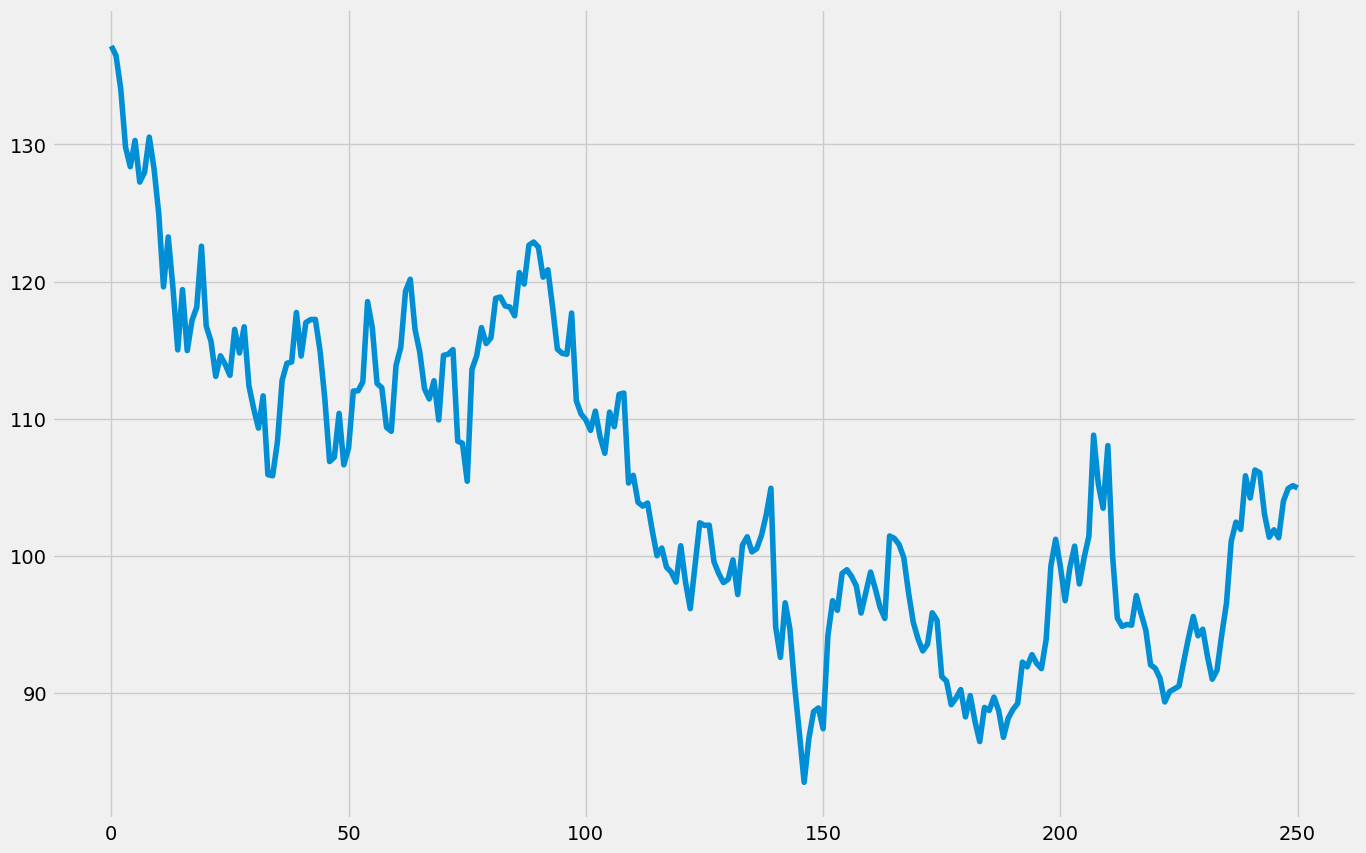

In [11]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Close"])  # 收盘价
plt.show()

In [26]:
figure = px.line(data, 
                 x='Date', 
                 y='Close')
figure.update_xaxes(rangeslider_visible=True)
figure.show()

In [27]:
figure = px.line(data, 
                 x='Date', 
                 y='Close')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

figure.show()

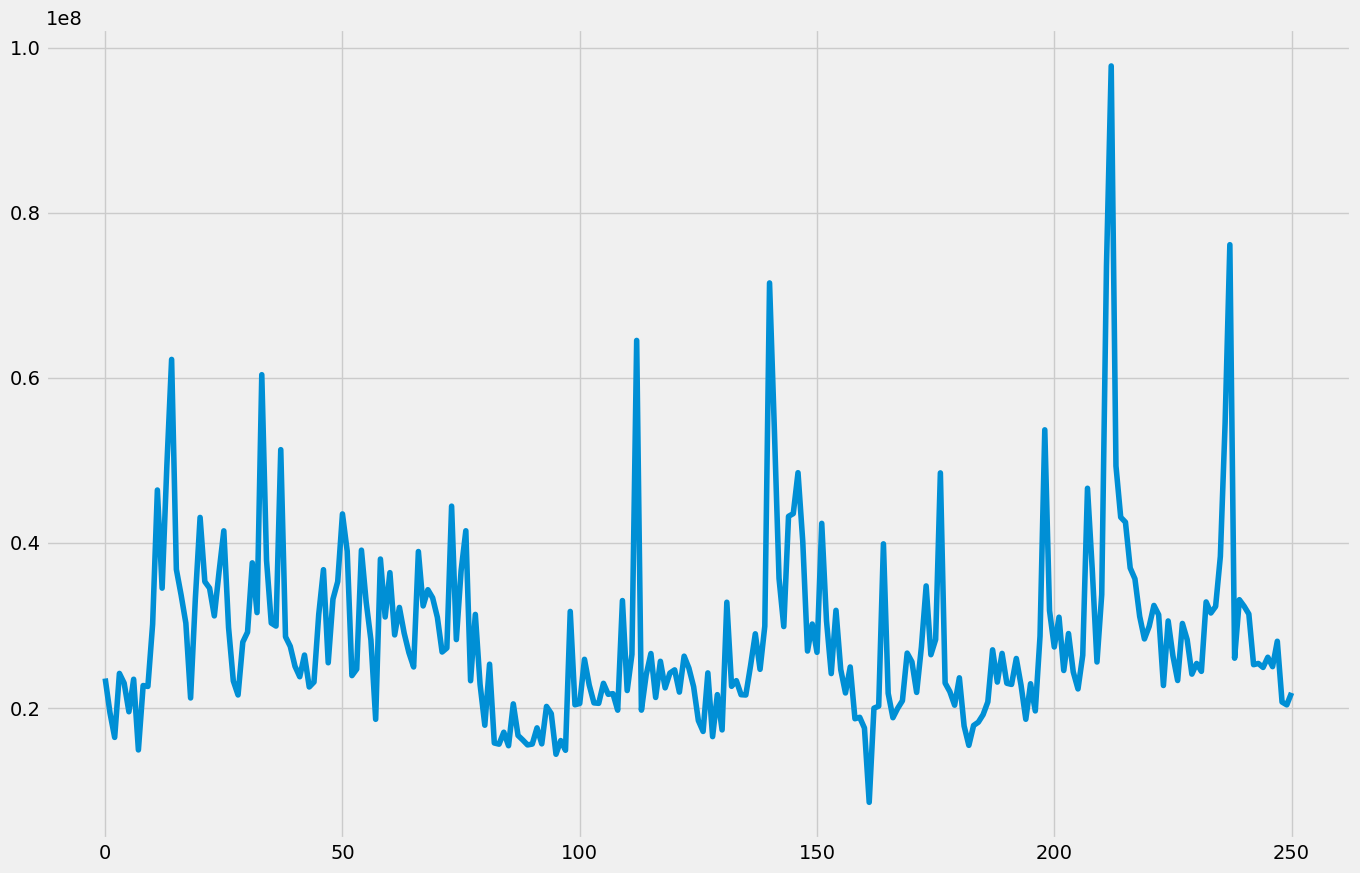

In [28]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Volume"])
plt.show()

In [15]:
# 成交量柱状图

figure = px.bar(data,y= "Volume")
figure.show()

In [16]:
import statsmodels 

print(statsmodels.__version__)

0.14.0


<Figure size 640x480 with 0 Axes>

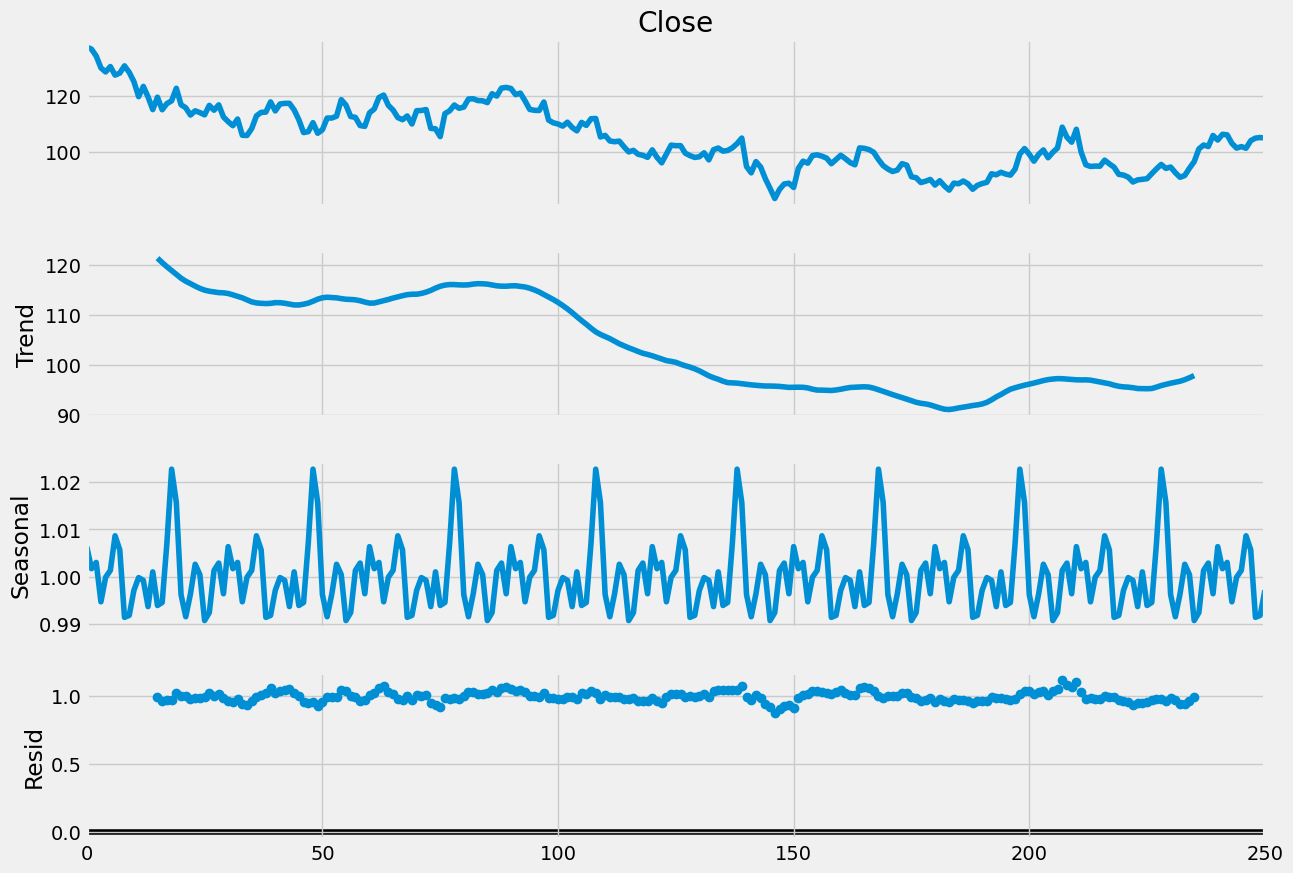

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', 
                            period=30
                           )
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

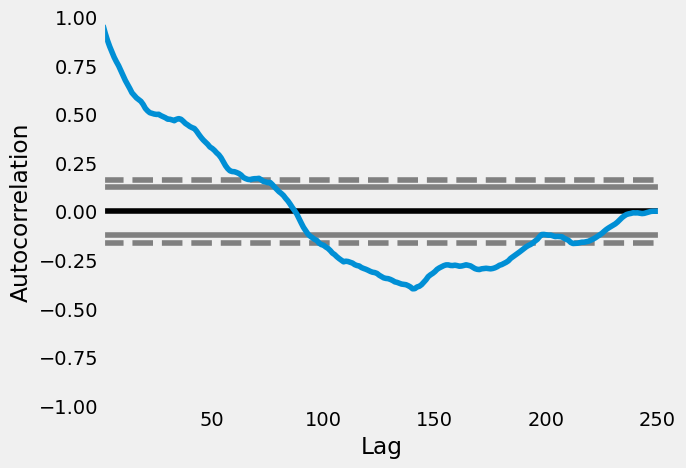

In [18]:
pd.plotting.autocorrelation_plot(data["Close"])

plt.show()

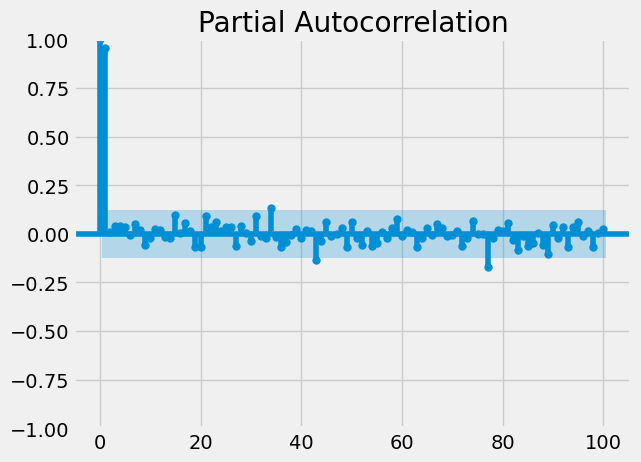

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)
plt.show()

In [20]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -596.204
Date:                Tue, 12 Nov 2024   AIC                           1208.407
Time:                        11:19:17   BIC                           1236.579
Sample:                             0   HQIC                          1219.745
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4054      0.559     -0.725      0.469      -1.502       0.691
ar.L2          0.5393      0.549      0.981      0.326      -0.538       1.616
ar.L3         -0.0135      0.088     -0.153      0.8

In [21]:
# Forecast

predictions = fitted.predict()
print(predictions)

0        0.000000
1      137.175963
2      136.488666
3      134.130942
4      130.075431
          ...    
246    101.893841
247    101.495203
248    104.065100
249    104.834881
250    105.077136
Name: predicted_mean, Length: 251, dtype: float64


In [22]:
data["Close"]

0      137.175995
1      136.464996
2      134.010498
3      129.796494
4      128.374496
          ...    
246    101.320000
247    104.000000
248    104.910004
249    105.120003
250    104.949997
Name: Close, Length: 251, dtype: float64

In [23]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44327D+00    |proj g|=  1.05052D-01

At iterate    5    f=  2.36036D+00    |proj g|=  2.58152D-02

At iterate   10    f=  2.33893D+00    |proj g|=  1.83759D-02

At iterate   15    f=  2.33614D+00    |proj g|=  3.44313D-03

At iterate   20    f=  2.33608D+00    |proj g|=  5.83968D-04

At iterate   25    f=  2.33606D+00    |proj g|=  2.25395D-04

At iterate   30    f=  2.33601D+00    |proj g|=  3.97514D-03

At iterate   35    f=  2.33520D+00    |proj g|=  1.23647D-02

At iterate   40    f=  2.33388D+00    |proj g|=  3.63812D-03

At iterate   45    f=  2.33303D+00    |proj g|=  1.48712D-02


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  2.33209D+00    |proj g|=  4.00516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     62      1     0     0   4.005D-03   2.332D+00
  F =   2.3320862332139702     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -585.354
Date:                            Tue, 12 Nov 2024   AIC                           1200.707
Time:                                    11:20:10   BIC                           1252.791
Sample:                                         0   HQIC                          1221.698
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1866      0.490      2.423      0.015       0.227       2.147
ar.L2         -0.5899      0.401     -1.470      0.142      -1.376       0.197
ar.L3          0.0389      0.118      0.330      0.741      -0.192       0.270
ar.L4         -0.0868      0.121     -0.716      0.474      -0.324       0.151
ar.L5         -0.0202      0.102     -0.198      0.843      -0.221       0.180
ma.L1         -1.2425      0.490     -2.535      0.011      -2.203      -0.282
ma.L2          0.6019      0.415      1.451      0.147      -0.211       1.415
ar.S.L12       0.4024      2.825      0.142      0.887      -5.135       5.940
ar.S.L24       0.0044      0.218      0.020      0.984      -0.423       0.432
ar.S.L36       0.0501      0.121      0.413      0.679      -0.188       0.288
ar.S.L48      -0.0229      0.176     -0.131      0.896      -0.367       0.321
ar.S.L60      -0.0361      0.105     -0.343      0.731      -0.242       0.170
ma.S.L12      -1.4209      2.780     -0.511      0.609      -6.870       4.028
ma.S.L24       0.4628      2.647      0.175      0.861      -4.725       5.651
sigma2         7.1670      0.881      8.131      0.000       5.439       8.895
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.98
Prob(Q):                              0.82   Prob(JB):                         0.01
Heteroskedasticity (H):               0.66   Skew:                             0.14
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
predictions = model.predict(len(data), len(data)+10)
predictions

251    105.025830
252    104.987729
253    103.329558
254    102.294535
255    102.478774
256    102.763660
257    103.010179
258    103.668788
259    103.254579
260    102.769081
261    101.992812
Name: predicted_mean, dtype: float64

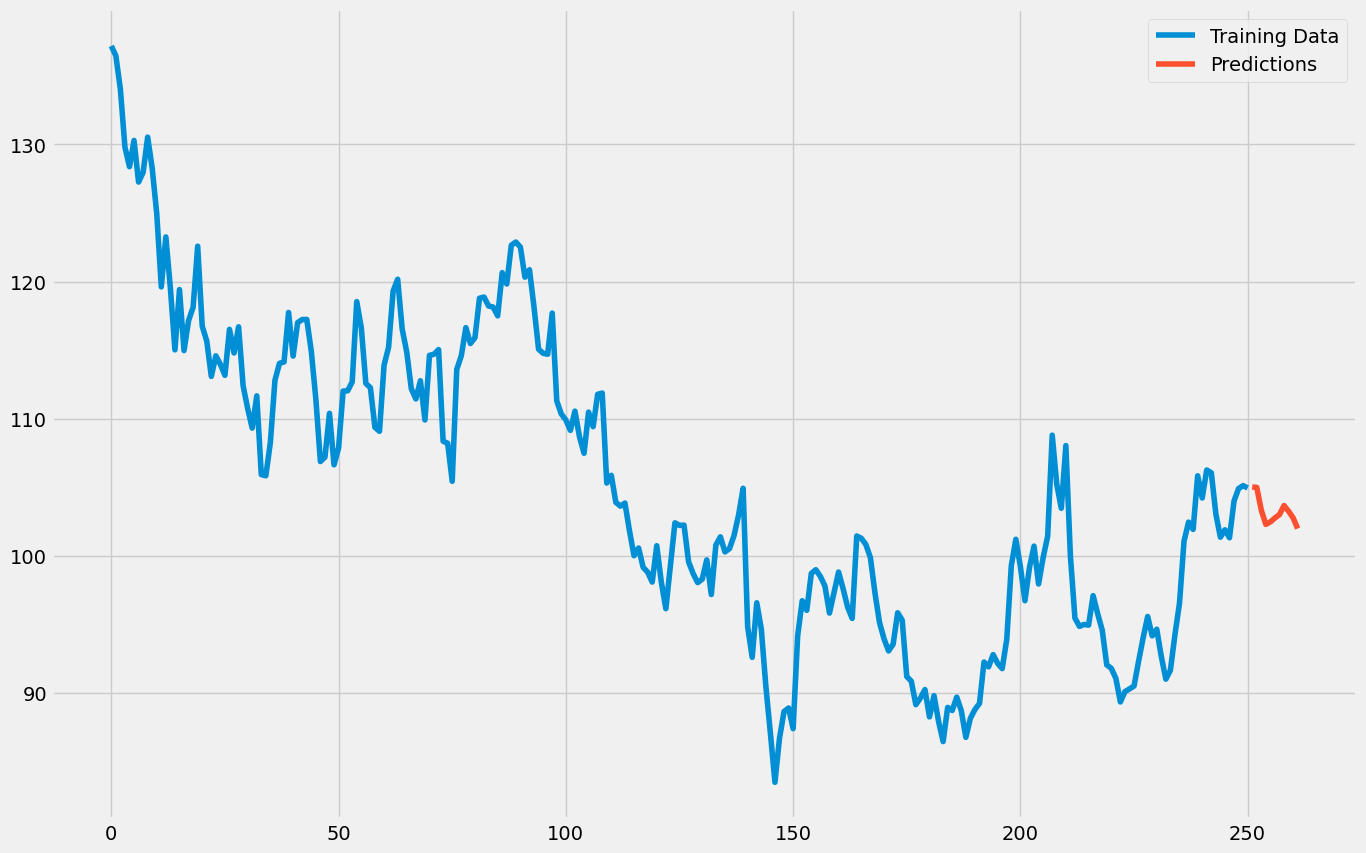

In [25]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))

predictions.plot(legend=True, label="Predictions")

plt.show()